In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [7]:
file_path = '../../data/KORE50/AIDA.tsv'

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")

In [8]:
data = []
current_doc_id = None
doc_count = 0
mention_line_count = 0

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()

            if line.startswith('-DOCSTART-'):
                match = re.search(r'\((.*?)\)', line)
                current_doc_id = match.group(1) if match else f"DOC_{doc_count}"
                doc_count += 1
                continue

            if not line:
                continue

            if '\t' in line:
                parts = line.split('\t')
                if len(parts) == 4:
                    token, mention_type, mention_string, entity = parts
                    data.append([current_doc_id, token, mention_type, mention_string, entity])
                    mention_line_count += 1

    df = pd.DataFrame(data, columns=['doc_id', 'token', 'mention_type', 'mention_string', 'entity'])
except Exception as e:
    print(f"An error occurred during file processing: {e}")
    df = pd.DataFrame()

print(f"Total documents found: {doc_count}")
print(f"Total mention tokens processed: {mention_line_count}")

Total documents found: 50
Total mention tokens processed: 160


In [9]:
df

,doc_id,token,mention_type,mention_string,entity
0,1 CEL01,David,B,David,David_Beckham
1,1 CEL01,Victoria,B,Victoria,Victoria_Beckham
2,1 CEL01,Brooklyn,B,Brooklyn,--NME--
3,1 CEL01,Romeo,B,Romeo,--NME--
4,1 CEL01,Cruz,B,Cruz,--NME--
...,...,...,...,...,...
155,48 POL08,Greece,B,Greece,Greece
156,49 POL09,Obama,B,Obama,Barack_Obama
157,49 POL09,Merkel,B,Merkel,Angela_Merkel
158,49 POL09,JFK,B,JFK,John_F\u002e_Kennedy_International_Airport



Token Count by Mention Type (B/I):
mention_type
B    148
I     12
Name: count, dtype: int64


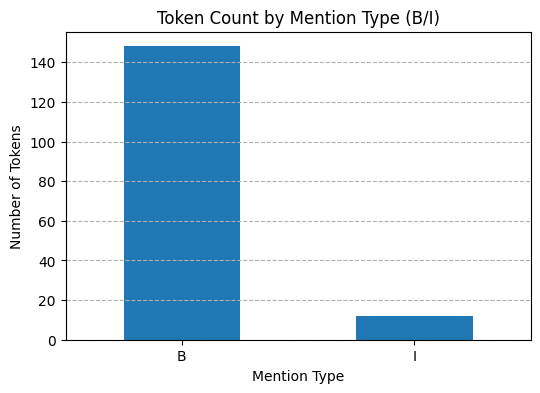

In [10]:
mention_counts = df['mention_type'].value_counts()
print("\nToken Count by Mention Type (B/I):")
print(mention_counts)

plt.figure(figsize=(6, 4))
mention_counts.plot(kind='bar', rot=0)
plt.title('Token Count by Mention Type (B/I)')
plt.xlabel('Mention Type')
plt.ylabel('Number of Tokens')
plt.grid(axis='y', linestyle='--')
plt.show()

In [11]:
unique_mentions_count = df[df['mention_type'] == 'B']['mention_string'].nunique()
print(f"\nNumber of unique full mentions (starting with 'B'): {unique_mentions_count}")

print("\n### B. Entity Disambiguation Analysis")

nme_counts = df['entity'].value_counts()
nme_count = nme_counts.get('--NME--', 0)
nme_percentage = (nme_count / len(df)) * 100 if len(df) > 0 else 0
print(f"\nTotal entities/tokens labeled '--NME--': {nme_count}")
print(f"Percentage of tokens labeled '--NME--': {nme_percentage:.2f}%")


Number of unique full mentions (starting with 'B'): 132

### B. Entity Disambiguation Analysis

Total entities/tokens labeled '--NME--': 5
Percentage of tokens labeled '--NME--': 3.12%


In [12]:
valid_entities = nme_counts[nme_counts.index != '--NME--']
top_entities = valid_entities.head(10)
print("\nTop 10 Most Frequent YAGO2 Entities (Token-level):")

print(top_entities)


Top 10 Most Frequent YAGO2 Entities (Token-level):
entity
Bob_Dylan                               3
Stanford_University                     3
Steve_Jobs                              3
World_War_II                            3
U\u002eS\u002e_Open_\u0028golf\u0029    2
Victoria_Beckham                        2
Madonna_\u0028entertainer\u0029         2
Desire_\u0028Bob_Dylan_album\u0029      2
Eric_Clapton                            2
First_Lady_of_Argentina                 2
Name: count, dtype: int64



Descriptive Statistics for Full Mention String Length (Characters):
count    148.000000
mean       6.317568
std        3.023799
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       22.000000
Name: mention_length, dtype: float64


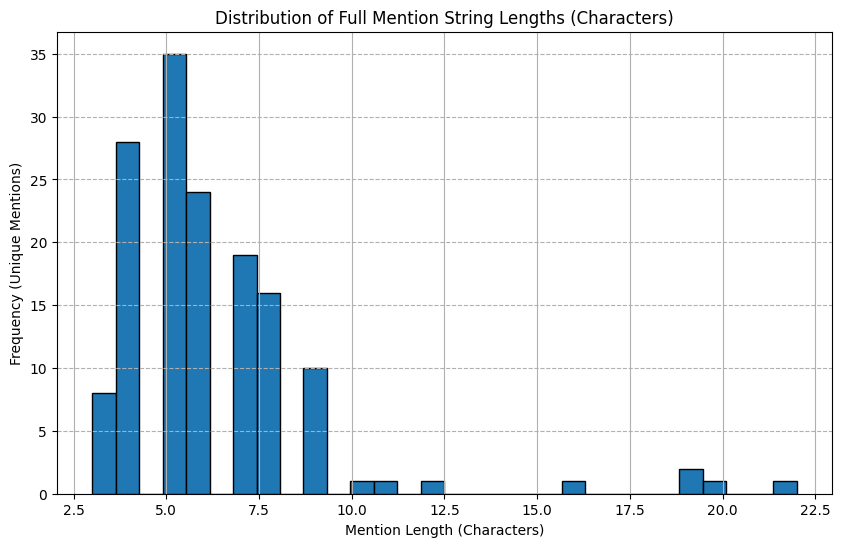

In [13]:
mentions_df = df[df['mention_type'] == 'B'].copy()

mentions_df['mention_length'] = mentions_df['mention_string'].apply(len)

print("\nDescriptive Statistics for Full Mention String Length (Characters):")
print(mentions_df['mention_length'].describe())

plt.figure(figsize=(10, 6))
mentions_df['mention_length'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Full Mention String Lengths (Characters)')
plt.xlabel('Mention Length (Characters)')
plt.ylabel('Frequency (Unique Mentions)')
plt.grid(axis='y', linestyle='--')
plt.show()

In [14]:
top_mentions = mentions_df['mention_string'].value_counts().head(10)
print("\nTop 10 Most Frequent Full Mentions (string):")
print(top_mentions)


Top 10 Most Frequent Full Mentions (string):
mention_string
Steve        3
Stanford     3
Dylan        3
David        2
Microsoft    2
Kennedy      2
Victoria     2
Tiger        2
Apple        2
Bill         2
Name: count, dtype: int64
